In [2]:
#Importing Libraries 
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading the dataset from GITHUB

In [3]:
TitanicData  = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
TitanicData.shape


(891, 12)

In [5]:
TitanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis (EDA)

In [6]:
TitanicData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
TitanicData =TitanicData.drop(["PassengerId", "Name"], axis=1)

In [8]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


# Missing null values check

In [9]:
TitanicData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Observation:
1. 'Age', 'Embarked', and 'Cabin' have null values.

2. 19% of 'Age' data is null value,0.22% of 'Embarked' is null value, while 77.10% 'Cabin' data is null value.

3. Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

In [10]:
TitanicData = TitanicData.drop("Cabin", axis=1)

In [11]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [12]:
#Getting the basic summary and statistical information of the data
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [13]:
TitanicData.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [14]:
TitanicData.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#A higher Std than mean in 'Fare' column indicates postive skewness.

In [15]:
#checking for unique elements in each of the column

TitanicData.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

"Survived" - Target / Label column has 2 categories / classes.

"sex" - Feature column has 2 categories / classes.

"Pclass" - Feature column has 3 categories / classes.

"Embarked" - Feature column has 3 categories / classes.

"SibSp" - Feature column has 7 discrete values.

"Parch" - Feature column has 7 discrete values.

# Dataframe Description:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, predict if an arbitrary passenger on Titanic would survive the sinking or not.

Feature Columns:

Pclass : Passenger Ticket Class

Sex : Sex of Passengers

Age : Age of Passengers

Parch : Number of parents / children onboard

sibsp : Number of siblings / spouses onboard

Embarked: Port from which the passenger Embarked

Fare : Ticket Fare

Cabin : Cabin's number

Target Column:

Survived: Whether Survived or not

# Analyzing the Target Class

In [16]:
TitanicData['Survived'].unique()

array([0, 1], dtype=int64)

There are 2 unique catergorical values in the Label column / target variable.

In [17]:
TitanicData['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Class '0' : Has 549 values

'1' : Has 342 values

<AxesSubplot:xlabel='Survived', ylabel='count'>

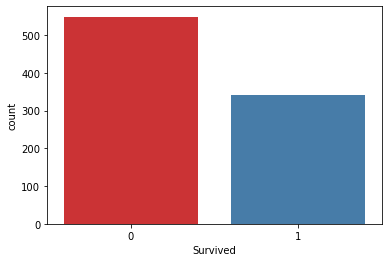

In [18]:
# Checking for Class Imbalance

sns.countplot(TitanicData['Survived'], palette="Set1")

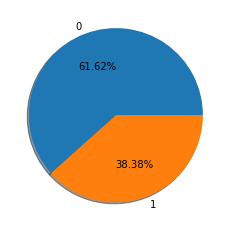

In [20]:
labels = '0','1'
fig, ax = plt.subplots()
ax.pie(TitanicData['Survived'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class '0' : Has 61.62% of total values

'1' : Has 38.38% of total values

Classes are imbalanced.

In [22]:
#Analyzing Feature column Catergorical Classes
TitanicData['Sex'].unique() 



array(['male', 'female'], dtype=object)

'Sex' colum has 2 categories: 'male' and 'female'

In [23]:
TitanicData['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

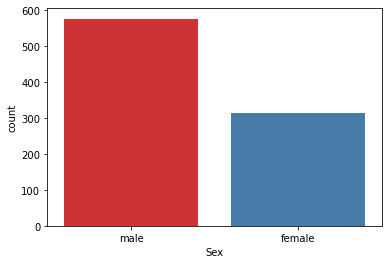

In [24]:
sns.countplot(TitanicData['Sex'], palette="Set1")

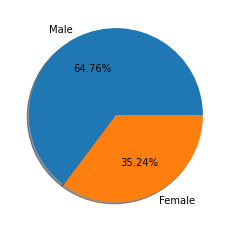

In [26]:
labels = 'Male','Female'
fig, ax = plt.subplots()
ax.pie(TitanicData['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Males comprissed 64.76% of the total passengers while Females comprised 35.24%.

In [28]:
TitanicData['Pclass'].unique() 

array([3, 1, 2], dtype=int64)

'Pclass' comprises of ordinal categorical data of classes : 1,2 and, 3

In [29]:
TitanicData['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclasses 3,1 and ,2 consist of 491,216 and 184 passengers respectively

<AxesSubplot:xlabel='Pclass', ylabel='count'>

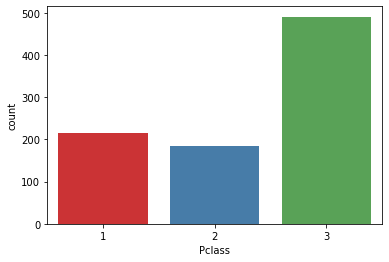

In [30]:
sns.countplot(TitanicData['Pclass'], palette="Set1")

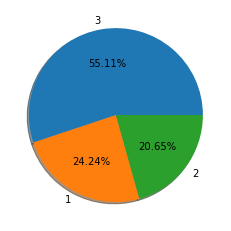

In [31]:
labels = '3','1','2'
fig, ax = plt.subplots()
ax.pie(TitanicData['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Majority of the passengers belonged to Pclass : 3 with 55.11% at total passengers, followed by Pclass: 1 with 20.65% and lastly 20.65% of the passengers belonged to Pclass: 2

In [33]:
TitanicData['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

There are 3 categories denoting the points of embarkation.

In [34]:
TitanicData['Embarked'].isnull().sum()

2

"guessing the points of embarkation" using estimation techniques is not sensible, therefore, dropping rows with null value since losing those 2 rows will not cause any significant loss to the training dataset

In [35]:
TitanicData.loc[pd.isna(TitanicData["Embarked"]), :].index #finding the indices where 'Embarked' value is NaN

Int64Index([61, 829], dtype='int64')

In [36]:
TitanicData.drop([61,829],inplace=True)

In [37]:
TitanicData.shape

(889, 9)

In [38]:
TitanicData.reset_index(drop=True,inplace = True)

In [39]:
TitanicData['Embarked'].isnull().sum() 

0

All null values from 'Embarked' have been removed.

In [40]:
TitanicData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

644 embarked from 'S', 168 embarked from C, 77 embarked from Q

<AxesSubplot:xlabel='Embarked', ylabel='count'>

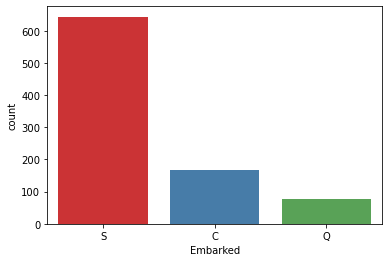

In [42]:
sns.countplot(TitanicData['Embarked'], palette="Set1")

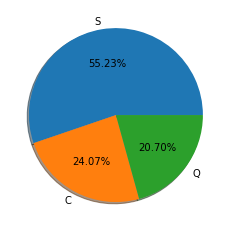

In [44]:
labels = 'S','C','Q'
fig, ax = plt.subplots()
ax.pie(TitanicData['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

55.23% of the passengers embarked from 'S', 24.07% of the passengers embarked from 'C',20.70% of the passengers embarked from

Encoding the categorical data in 'Sex' and 'Embarked'.

In [46]:
TitanicData['Sex'] = TitanicData.Sex.map({'female':0,'male':1})

In [48]:
dumm = pd.get_dummies(TitanicData['Embarked'],drop_first = False)

In [49]:
dumm

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [50]:
TitanicData = TitanicData.join(dumm)

In [51]:
TitanicData.drop(columns = ['Embarked'],axis = 1, inplace = True)

In [52]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,1,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,0,0,1
4,0,3,1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,211536,13.0000,0,0,1
885,1,1,0,19.0,0,0,112053,30.0000,0,0,1
886,0,3,0,NaN,1,2,W./C. 6607,23.4500,0,0,1
887,1,1,1,26.0,0,0,111369,30.0000,1,0,0


In [54]:
TitanicData.drop(columns = ['Ticket'],inplace = True)

In [55]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0,0,1
885,1,1,0,19.0,0,0,30.0000,0,0,1
886,0,3,0,NaN,1,2,23.4500,0,0,1
887,1,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:xlabel='Age'>

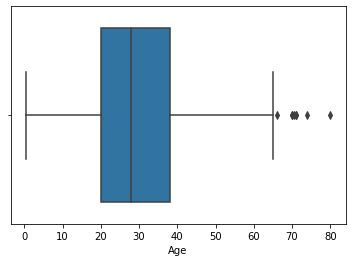

In [56]:
#Filling NaN values in 'Age' column
sns.boxplot(TitanicData['Age'])

There are outliers present in age therefore, mean data will not be used to fill in the missing values since it is affected by outliers.

In [57]:

#Using KNN Imputation technique for imputing missing data.

In [58]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
TitanicData_new= TitanicData.copy()

In [59]:
TitanicData_new = imp.fit_transform(TitanicData_new[['Sex','Age']])

In [60]:
TitanicData_new 

array([[ 1., 22.],
       [ 0., 38.],
       [ 0., 26.],
       ...,
       [ 0., 32.],
       [ 1., 26.],
       [ 1., 32.]])

In [61]:
type(TitanicData_new)

numpy.ndarray

In [62]:
TitanicData_new = pd.DataFrame(TitanicData_new, columns=['Sex','Age'])

In [65]:
TitanicData_new.index = TitanicData.index

In [66]:
TitanicData[['Age','Sex']] = TitanicData_new[['Age','Sex']]

In [67]:
TitanicData['Age'].isnull().sum()

0

In [68]:
#Finding Correlation
t_corr = TitanicData.corr()
t_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.061387,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327795,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.065452,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.061387,-0.327795,0.065452,1.000000,-0.225819,-0.173839,0.091212,0.034131,-0.004313,-0.027190
SibSp,-0.034040,0.081656,-0.116348,-0.225819,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.173839,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.091212,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
C,0.169966,-0.245733,-0.084520,0.034131,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.004313,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.027190,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


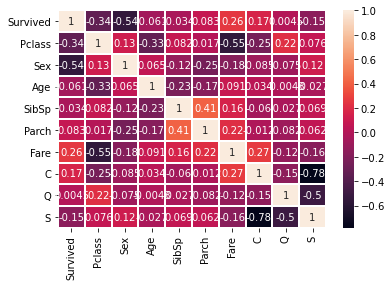

In [69]:
plt.figure
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column

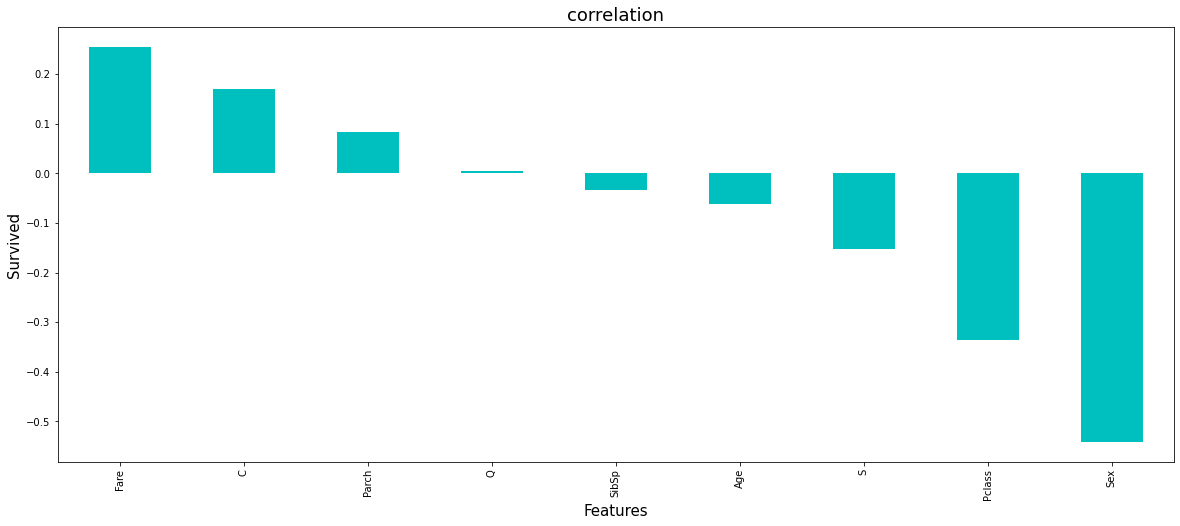

In [71]:
plt.figure(figsize = (20,8))
TitanicData.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It can be observed that 'female' has the highest positive correlation with 'Survived', while 'Male' has the highest negative correlation with 'Survived'.

This may be due to the 'Save women and children first' policy, while the men risked their lives to save and evacuate the passengers.

Pclass also has a high negative correlation with 'Survived' indicating that Pclass 1 passengers were given top priority during rescue and evacuation.

Fare also has a considerable correlation with 'Survived' indicating that those who paid premium prices were given higher priority during rescue and evacuation.

In [72]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

# Interpreting Relationship between Dependent Variable and Independent Variables

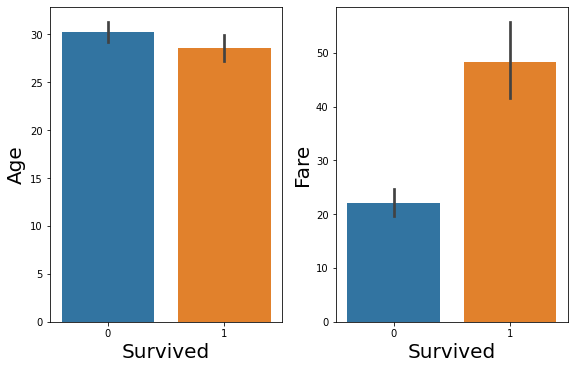

In [73]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = TitanicData['Survived']
X = TitanicData[['Age','Fare']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

It can be observed that the passengers who paid higher fare amounts were more likely to have survived than those who paid lesser amounts.

It can also observed that, there isn't a very strong correlation between passenger age and survival.

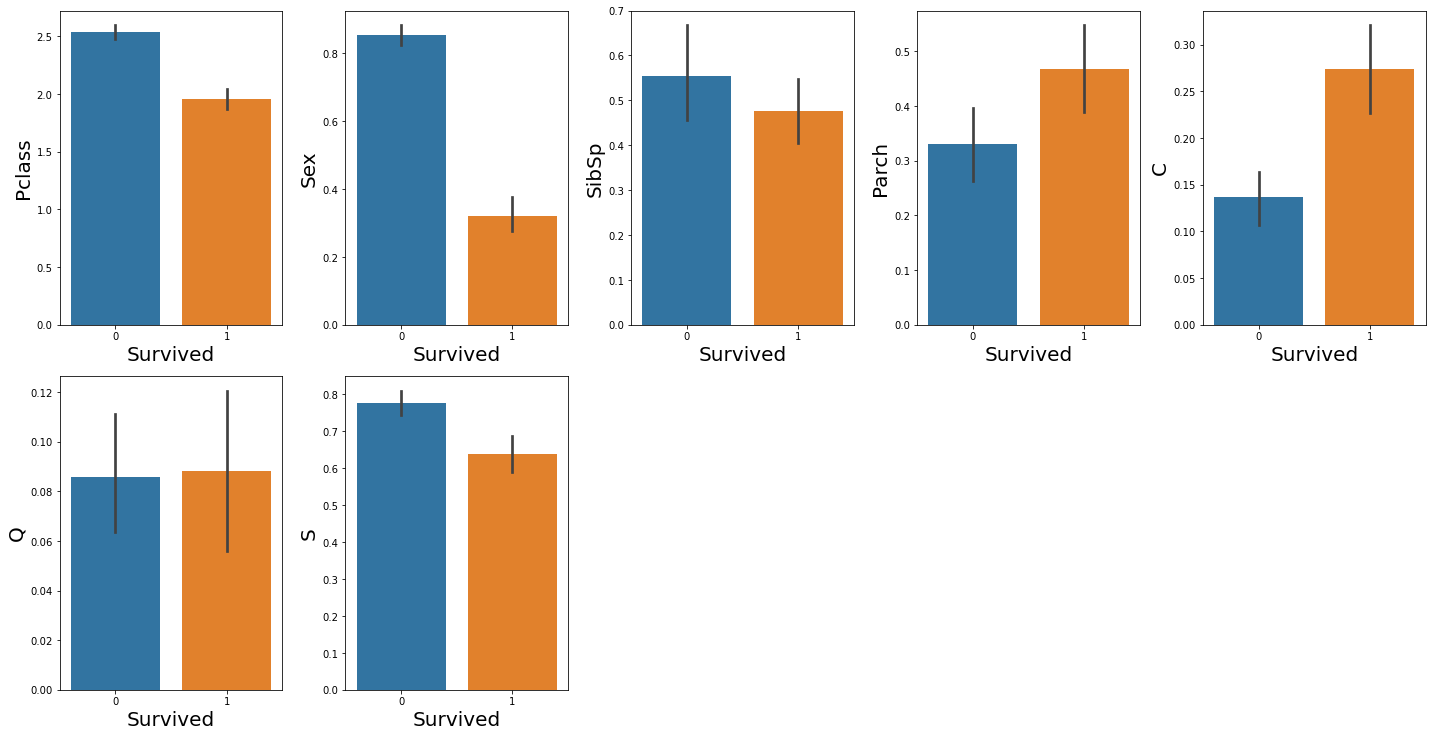

In [75]:
#'Survived' vs Categorical/Discrete Data Columns

plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = TitanicData['Survived']
X = TitanicData.drop(columns=['Survived','Age','Fare'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

From the graphs above, it can be observed that Passengers belonging to Pclass 1 and 2 had highest survival chance. Women had higher chance of survival than men. Passengers who embarked from 'C' had higher chance of Survival than those who had embarked from 'Q' and 'S'

Combining 'SibSP' and 'Parch' to form 'Family' column to get a better understanding of correlation between survivors and passengers traveling with thier families.

In [76]:
TitanicData['Families'] = TitanicData['Parch']+TitanicData['SibSp']

In [77]:
TitanicData['Families']

0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    0
886    3
887    0
888    0
Name: Families, Length: 889, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

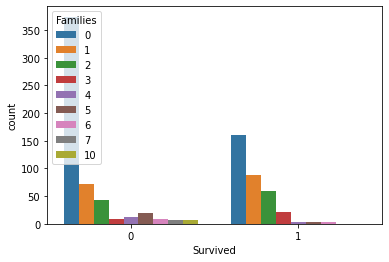

In [78]:
sns.countplot(y, hue =TitanicData['Families'])

It can be observed that amongst those who survived and those who didnt, Solo passengers are the most. While passengers onboard with smaller families had higher chance of survival than those with big families.

In [80]:
#Dropping columns 'SibSp' and 'Parch'
TitanicData.drop(columns=['SibSp','Parch'],inplace=True )

<AxesSubplot:xlabel='Survived', ylabel='count'>

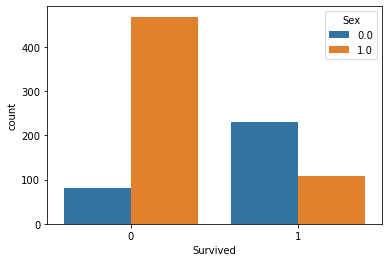

In [81]:
sns.countplot(y, hue =TitanicData['Sex'])

Women were more likely to have survived than men

<AxesSubplot:xlabel='Survived', ylabel='Age'>

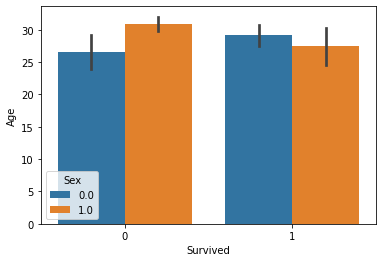

In [82]:
sns.barplot(x =TitanicData['Survived'],y = TitanicData['Age'], hue = TitanicData['Sex'])

It can also be observed that amongst the survivors the males were mostly young indicating that the young children were given highest priority during rescue and evacuation while the young and able bodied men were able to save themselves and the older ones were unfortunate

In [83]:
TitanicData

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,1.0,22.0,7.2500,0,0,1,1
1,1,1,0.0,38.0,71.2833,1,0,0,1
2,1,3,0.0,26.0,7.9250,0,0,1,0
3,1,1,0.0,35.0,53.1000,0,0,1,1
4,0,3,1.0,35.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
884,0,2,1.0,27.0,13.0000,0,0,1,0
885,1,1,0.0,19.0,30.0000,0,0,1,0
886,0,3,0.0,32.0,23.4500,0,0,1,3
887,1,1,1.0,26.0,30.0000,1,0,0,0


# Handling the Outliers

In [84]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

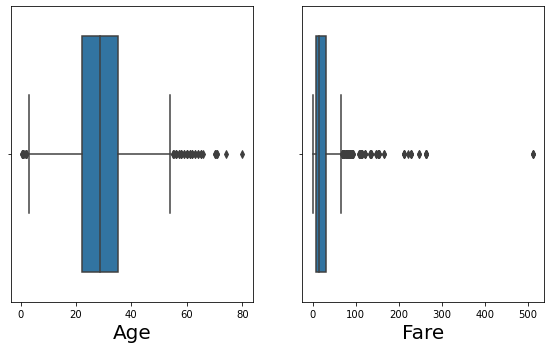

In [85]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Removing Outliers using Z score Method

In [86]:
df2 = X[feat].copy()

In [87]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [88]:
df3.shape

(862, 2)

In [89]:
df2.shape

(889, 2)

In [90]:
#Data loss % check
loss = (889-862)/889*100

In [91]:
loss

3.0371203599550056

3.03% Data loss is within acceptable range

# Removing Outliers using IQR Method 

In [92]:
df =X[feat].copy()

In [93]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [94]:
indxdrop 

array([  7.,  11.,  15.,  16.,  33.,  54.,  77.,  93.,  95., 115., 118.,
       151., 163., 169., 171., 173., 182., 194., 204., 231., 251., 267.,
       274., 279., 296., 304., 325., 339., 365., 380., 385., 437., 455.,
       466., 468., 478., 482., 486., 491., 492., 529., 544., 554., 569.,
       586., 624., 625., 629., 641., 643., 646., 658., 671., 683., 693.,
       744., 754., 771., 787., 802., 823., 826., 829., 849., 877.,   1.,
        27.,  31.,  34.,  52.,  61.,  71.,  87., 101., 117., 119., 123.,
       138., 150., 158., 179., 194., 200., 214., 217., 223., 229., 244.,
       255., 256., 257., 261., 267., 268., 274., 289., 290., 296., 298.,
       304., 305., 306., 309., 310., 317., 318., 323., 324., 331., 333.,
       335., 336., 340., 365., 368., 372., 374., 376., 379., 384., 389.,
       392., 411., 434., 437., 444., 452., 483., 485., 495., 497., 503.,
       504., 519., 526., 536., 539., 543., 549., 556., 557., 580., 584.,
       586., 590., 608., 626., 640., 644., 654., 65

In [95]:
df = df.drop(indxdrop)

In [96]:
df.shape

(721, 2)

In [97]:
loss=(889-721)/889 * 100
loss

18.89763779527559

18.89% data loss is outside acceptable range.

# Using Z score method to reduce outliers

In [98]:
dropindx = X.index.difference(df3.index)

In [99]:
dropindx

Int64Index([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
            526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
            849],
           dtype='int64')

In [100]:
TitanicData.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [101]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

In [102]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

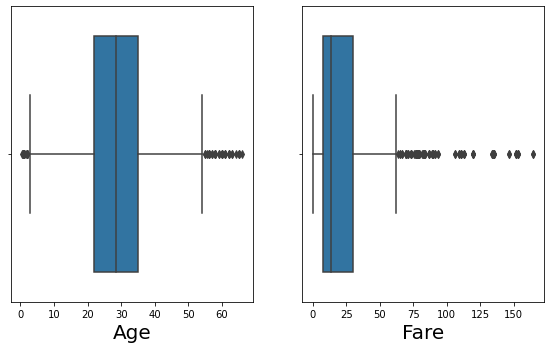

In [103]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Normalizing Data Distribution

In [104]:
X[feat].skew()

Age     0.238238
Fare    2.279424
dtype: float64

In [105]:
(X[feat]==0).sum()

Age      0
Fare    15
dtype: int64

There are outliers present in fare therefore, mean data will not be used to fill in the missing values since it is affected by outliers.

In [106]:
# Using KNN Imputation technique for imputing missing data.
imp = KNNImputer(n_neighbors=2)


In [107]:
X_filled = X.copy()

In [108]:
X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])

In [109]:
X_filled

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [110]:
type(X_filled)

numpy.ndarray

In [111]:
X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare']) #to convert numpy array back into dataframe

In [112]:
X_filled.index = X.index

In [113]:
X[['Pclass','Fare']] = X_filled[['Pclass','Fare']]

In [114]:
X['Fare'].isnull().sum()

0

There are no more values missing from 'Fare' column

In [117]:
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare        2.279424
C           1.680697
Q           2.910027
S          -1.056235
Families    2.802387
dtype: float64

# Reducing skewness further using PowerTransformer

In [118]:
from sklearn.preprocessing import PowerTransformer

In [119]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['Fare','Families']]
transformed= powtrans.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe
transformed.skew()

Fare       -0.009414
Families    0.546482
dtype: float64

In [120]:
transformed.index = X.index
X[['Fare','Families']] = transformed[['Fare','Families']]
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare       -0.009414
C           1.680697
Q           2.910027
S          -1.056235
Families    0.546482
dtype: float64

In [121]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

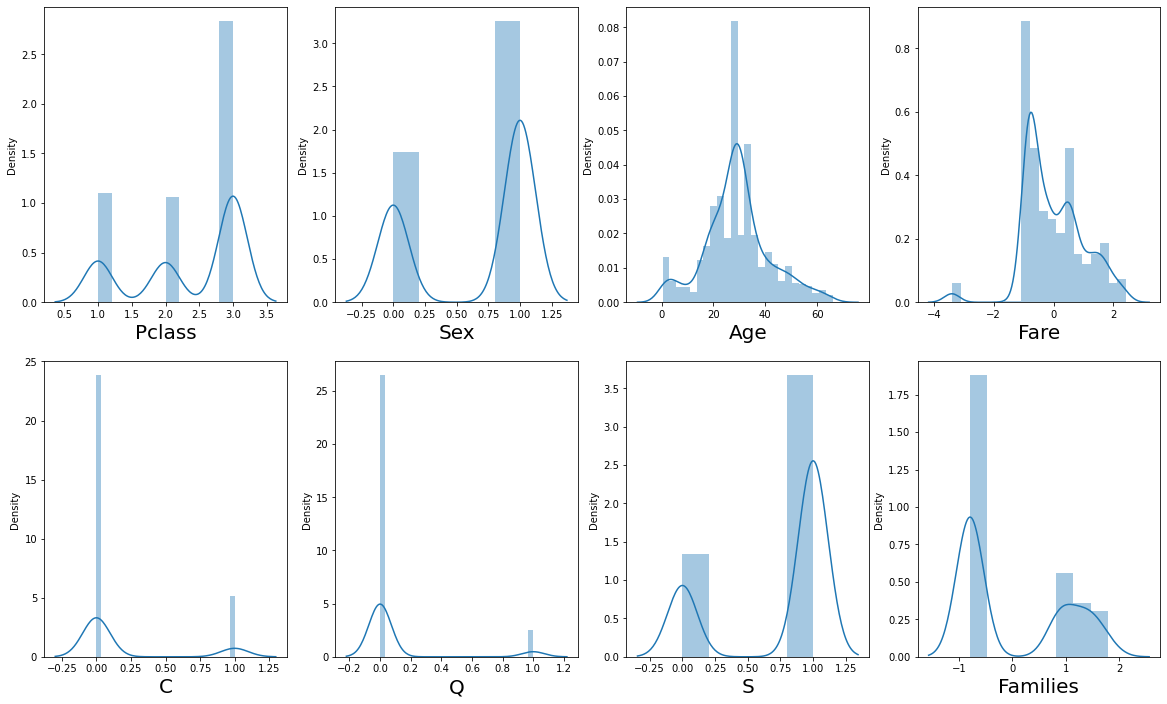

In [122]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Feature Selection

In [123]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X 

array([[ 0.7994893 ,  0.73062154, -0.58138018, ..., -0.31095355,
         0.60326118,  0.90850781],
       [-1.64868042, -1.36869768,  0.702247  , ..., -0.31095355,
        -1.65765681,  0.90850781],
       [ 0.7994893 , -1.36869768, -0.26047338, ..., -0.31095355,
         0.60326118, -0.79210461],
       ...,
       [ 0.7994893 , -1.36869768,  0.22088681, ..., -0.31095355,
         0.60326118,  1.52047922],
       [-1.64868042,  0.73062154, -0.26047338, ..., -0.31095355,
        -1.65765681, -0.79210461],
       [ 0.7994893 ,  0.73062154,  0.22088681, ...,  3.21591437,
        -1.65765681, -0.79210461]])

# Checking for Multicollinearity using Variance Inflation Factor

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Pclass,2.090198
1,Sex,1.143503
2,Age,1.205194
3,Fare,2.514240
4,C,inf
5,Q,inf
6,S,inf
7,Families,1.656581


# Selecting Kbest Features

In [126]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 8)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

    Feature       Score
1       Sex  339.693591
0    Pclass  105.325560
3      Fare   97.228558
7  Families   28.326530
4         C   23.201391
6         S   19.167697
2       Age    2.575024
5         Q    0.111014


# Buidling classification model

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
#Finding the best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i,stratify = y)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8582089552238806 on random_state: 16


In [129]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, stratify = y,random_state = 16) #since 

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [135]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

In [136]:
#Training the Models
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

# Decision Tree Classifier Model Accuracy

In [137]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
conf_matrx

array([[144,  23],
       [ 26,  75]], dtype=int64)

In [138]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.77      0.74      0.75       101

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



# Logistic Regression Model Accuracy

In [139]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[147,  20],
       [ 23,  78]], dtype=int64)

In [140]:
print(accu)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       167
           1       0.80      0.77      0.78       101

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



# Random Forest Classifier Model Accuracy

In [141]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[143,  24],
       [ 20,  81]], dtype=int64)

In [142]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.77      0.80      0.79       101

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



# SV Classifier Model Accuracy

In [143]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[161,   6],
       [ 34,  67]], dtype=int64)

In [144]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       167
           1       0.92      0.66      0.77       101

    accuracy                           0.85       268
   macro avg       0.87      0.81      0.83       268
weighted avg       0.86      0.85      0.84       268



# K Nearest Neighbours Classifier Model Accuracy

In [145]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[154,  13],
       [ 30,  71]], dtype=int64)

In [146]:
print(accu)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       167
           1       0.85      0.70      0.77       101

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



# Model Cross Validation

In [147]:
from sklearn.model_selection import cross_val_score as cvs

In [149]:
 # Decision Tree Classifier
print(cvs(DTC,scaled_X,y,cv=5).mean())  

0.7761527086974056


In [150]:
#Logistic Regression
print(cvs(LOGR,scaled_X,y,cv=5).mean()) 

0.7888560290361608


In [151]:
#Random Forest Classifier
print(cvs(RFC,scaled_X,y,cv=5).mean())

0.7993749159833311


In [152]:
#SV Classifier
print(cvs(SV,scaled_X,y,cv=5).mean())

0.8155464444145718


In [154]:
#K Nearest Neighbours Classifier
print(cvs(KNN,scaled_X,y,cv=5).mean())

0.8121857776582875


# ROC AUC Scores

In [155]:
#Decision Tree Classifier
roc_auc_score(y_test,DTCpred)

0.8024248532637696

In [156]:
#Logistic Regression
roc_auc_score(y_test,LOGRpred)

0.826258374340428

In [157]:
#Random Forest Classifier
roc_auc_score(y_test,RFCpred)

0.8291338115847513

In [158]:
#SV Classifier
roc_auc_score(y_test,SVpred)


0.8137190964605443

In [159]:
#K Nearest Neighbours Classifier
roc_auc_score(y_test,KNNpred)

0.8125629928262287

Random Forest Classifier is the best model for the dataset, with roc_auc_score 0.8441

# ROC AUC curves

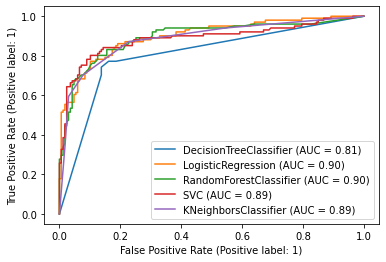

In [161]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Based on the above graph and roc_auc_scores, Random Forest Classifier is the best model for the dataset, with AUC = 0.90 and roc_auc_score = 0.83

# Hyper Parameter Tuning

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
#Random Forest Classifier
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [164]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

In [165]:
Best_mod1 = RandomForestClassifier(n_estimators = 60,criterion = 'gini', max_depth= 10, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 2)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

86.56716417910447


Random Forest Classifier has an accuracy of 86.56%

In [166]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[155,  12],
       [ 24,  77]], dtype=int64)

In [167]:
cr = classification_report(y_test,rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       167
           1       0.87      0.76      0.81       101

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.85       268
weighted avg       0.87      0.87      0.86       268



In [169]:
import joblib
joblib.dump(Best_mod1,"BestModelTitanic.pkl")

['BestModelTitanic.pkl']

# Loading The Model

In [170]:
mod=joblib.load("BestModelTitanic.pkl")

In [171]:
print(mod.predict(x_test))

[0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 1]
